In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [ ]:

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# prompt: write a code to import cs file from drive

from google.colab import drive
drive.mount('/content/drive')




In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP Project/amazon.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.info()

# Text preprocessing

In [ ]:
# Normalizing Case Folding
df['reviewText'] = df['reviewText'].str.lower()

# Punctuations
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]', '')

# Numbers
df['reviewText'] = df['reviewText'].str.replace('\d', '')

In [ ]:
!pip install nltk

In [ ]:
!pip intall nltk.stopwords
import nltk
nltk.download('stopwords')

In [ ]:
# Stopwords

# nltk.download('stopwords')
sw = stopwords.words('english')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [ ]:
# Rarewords

drops = pd.Series(' '.join(df['reviewText']).split()).value_counts()[-1000:]
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [ ]:
!pip intall textblob

In [ ]:
!pip install wordcloud

In [ ]:
# Tokenization

nltk.download("punkt")
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

In [ ]:
# Lemmatization

nltk.download('wordnet')
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['reviewText'].head(10)

# Text Visualization

In [18]:
tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,issues.,115.00
1,purchased,331.00
2,"device,",38.00
3,worked,436.00
4,advertised.,49.00


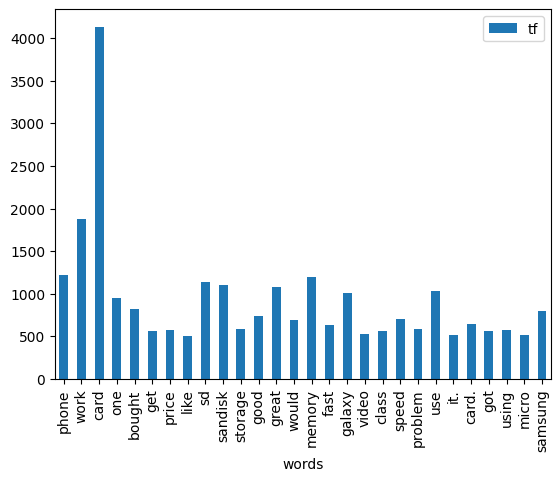

In [ ]:
# Barplot

tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

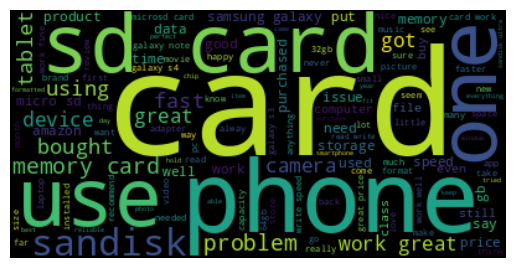

In [ ]:
# Wordcloud

text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

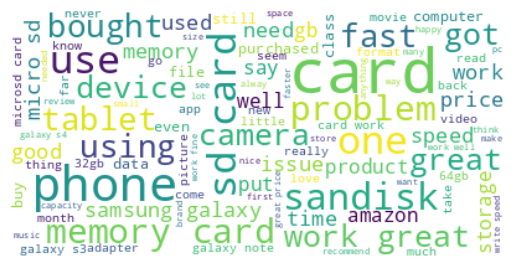

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# Sentimental analysis

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,issues.,23-07-2014,138,0,0,0,0,0.00,0.00
1,1,0mie,5,"purchased device, worked advertised. never muc...",25-10-2013,409,0,0,0,0,0.00,0.00
2,2,1K3,4,work expected. sprung higher capacity. think m...,23-12-2012,715,0,0,0,0,0.00,0.00
3,3,1m2,5,think worked great.had diff. bran 64gb card we...,21-11-2013,382,0,0,0,0,0.00,0.00
4,4,2&amp;1/2Men,5,"bought retail packaging, arrived legit, orange...",13-07-2013,513,0,0,0,0,0.00,0.00


In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores("The film was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [ ]:
sia.polarity_scores("I liked this music but it is not good as the other one")

{'neg': 0.207, 'neu': 0.666, 'pos': 0.127, 'compound': -0.298}

In [ ]:
df["reviewText"].apply(lambda x: x.upper())

,reviewText
0,ISSUES.
1,"PURCHASED DEVICE, WORKED ADVERTISED. NEVER MUC..."
2,WORK EXPECTED. SPRUNG HIGHER CAPACITY. THINK M...
3,THINK WORKED GREAT.HAD DIFF. BRAN 64GB CARD WE...
4,"BOUGHT RETAIL PACKAGING, ARRIVED LEGIT, ORANGE..."
...,...
4910,"BOUGHT SANDISK 16GB CLASS 10 USE HTC INSPIRE, ..."
4911,USED EXTENDING CAPABILITY SAMSUNG GALAXY NOTE ...
4912,GREAT CARD FAST RELIABLE. COME OPTIONAL ADAPTE...
4913,"GOOD AMOUNT SPACE STUFF WANT DO, FIT GOPRO. SAY?"


In [ ]:
df["reviewText"][0:10].apply(lambda x: sia.polarity_scores(x))

,reviewText
0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
3,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
4,"{'neg': 0.0, 'neu': 0.771, 'pos': 0.229, 'comp..."
5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,"{'neg': 0.096, 'neu': 0.593, 'pos': 0.311, 'co..."
7,"{'neg': 0.035, 'neu': 0.748, 'pos': 0.217, 'co..."
8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp..."


In [ ]:
df["polarity_score"] = df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity_score
0,0,NaN,4,issues.,23-07-2014,138,0,0,0,0,0.00,0.00,0.00
1,1,0mie,5,"purchased device, worked advertised. never muc...",25-10-2013,409,0,0,0,0,0.00,0.00,0.00
2,2,1K3,4,work expected. sprung higher capacity. think m...,23-12-2012,715,0,0,0,0,0.00,0.00,0.40
3,3,1m2,5,think worked great.had diff. bran 64gb card we...,21-11-2013,382,0,0,0,0,0.00,0.00,0.71
4,4,2&amp;1/2Men,5,"bought retail packaging, arrived legit, orange...",13-07-2013,513,0,0,0,0,0.00,0.00,0.86


# Sentiment modeling

In [ ]:
#Feauture Engineering
df["reviewText"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")


,reviewText
0,neg
1,neg
2,pos
3,pos
4,pos
5,neg
6,pos
7,pos
8,neg
9,pos


In [ ]:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
df.head(20)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity_score,sentiment_label
0,0,NaN,4,issues.,23-07-2014,138,0,0,0,0,0.00,0.00,0.00,neg
1,1,0mie,5,"purchased device, worked advertised. never muc...",25-10-2013,409,0,0,0,0,0.00,0.00,0.00,neg
2,2,1K3,4,work expected. sprung higher capacity. think m...,23-12-2012,715,0,0,0,0,0.00,0.00,0.40,pos
3,3,1m2,5,think worked great.had diff. bran 64gb card we...,21-11-2013,382,0,0,0,0,0.00,0.00,0.71,pos
4,4,2&amp;1/2Men,5,"bought retail packaging, arrived legit, orange...",13-07-2013,513,0,0,0,0,0.00,0.00,0.86,pos
5,5,2Cents!,5,mini storage. anything else supposed to. purch...,29-04-2013,588,0,0,0,0,0.00,0.00,0.00,neg
6,6,2K1Toaster,5,phone never skip beat. file transfer speedy co...,19-10-2013,415,0,0,0,0,0.00,0.00,0.90,pos
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5,hard believe affordable digital become. 32 gb ...,07-10-2014,62,0,0,0,0,0.00,0.00,0.81,pos
8,8,4evryoung,5,work htc rezound. running short space 64gb san...,24-03-2014,259,1,0,1,1,1.00,0.21,0.00,neg
9,9,53rdcard,5,"galaxy s4, super fast card, totally happy, hap...",10-11-2013,393,0,0,0,0,0.00,0.00,0.92,pos


In [ ]:
df["sentiment_label"].value_counts()

,count
sentiment_label,
pos,3934
neg,981


In [ ]:
df.groupby("sentiment_label")["overall"].mean()

,overall
sentiment_label,
neg,4.11
pos,4.71


In [ ]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
y = df["sentiment_label"]

In [ ]:
a = "This sandisk is very good product"

In [ ]:
TextBlob(a).ngrams(3)

[WordList(['This', 'sandisk', 'is']),
 WordList(['sandisk', 'is', 'very']),
 WordList(['is', 'very', 'good']),
 WordList(['very', 'good', 'product'])]

In [ ]:
#Count Vectors
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

In [ ]:
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = vectorizer.fit_transform(df['reviewText'][:2000])
frequencies = sum(sparse_matrix).toarray()[0]
ngrams = pd.DataFrame(frequencies, index=vectorizer.get_feature_names_out(), columns=['frequency'])
ngrams = ngrams.sort_values(by='frequency', ascending=False)
ngrams

,frequency
sd card,313
memory card,273
samsung galaxy,202
class 10,195
work great,187
...,...
glitchy day,1
glitches connected,1
glitch went,1
glitch note,1


In [ ]:
# word frekans
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [ ]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
X_w = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_w.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_n = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
X_n.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.37102749,
        0.30037873, 0.47060133, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37102749, 0.37102749, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37102749, 0.37102749, 0.        , 0.        ],
       [0.        , 0.        , 0.34488069, 0.34488069, 0.        ,
        0.22013288, 0.        , 0.34488069, 0.        , 0.        ,
        0.        , 0.34488069, 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.        ],
       [0.36153669, 0.36153669, 0.        , 0.        , 0.        ,
        0.23076418, 0.        , 0.        , 0.36153669, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36153669, 0.36153669, 0.36153669, 0.        ,
        0.        , 0.28503968, 0.28503968, 0.

In [ ]:
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

In [ ]:
# prompt: save the cout vectorizer and dump in the drive

import pickle

# Save the CountVectorizer
filename = '/content/drive/MyDrive/NLP Project/count_vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))


In [ ]:
#split the model train and test with 30% data with testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tf_idf_word, y, test_size=0.30, random_state=42)


In [ ]:
#check x and y shape

print(X_tf_idf_word.shape)
print(y.shape)


(4915, 7813)
(4915,)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3440, 7813)
(3440,)
(1475, 7813)
(1475,)


In [ ]:
#now scale the data with minmax scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())


In [ ]:
# now the sacler model and dump in the drive

# Save the MinMaxScaler
filename = '/content/drive/MyDrive/NLP Project/minmax_scaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))


# Modeling

In [ ]:
# Logistic Regression

log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y, scoring="accuracy",
                cv=5).mean()

model = pd.Series("this product is great")
model = pd.Series("look at that shit very bad")
model = pd.Series("it was good but I am sure that it fits me")

model = CountVectorizer().fit(X).transform(model)
log_model.predict(model)

array([1])

In [ ]:
random_review = pd.Series(df["reviewText"].sample(1).values)
random_review

,0
0,got use gopro hero 3+ fit worked well. since c...


In [ ]:
model = CountVectorizer().fit(X).transform(random_review)
log_model.predict(model)

array([1])

# Random Forest

In [ ]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

In [ ]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8295015259409968

In [ ]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8164801627670396

In [ ]:
#Hypertunning the model
rf_final = rf_model.set_params(**{'max_depth': None,
                             'max_features': 8,
                              'min_samples_split': 2,
                              'n_estimators': 100},random_state=0).fit(X_count, y)

In [ ]:
cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])



In [ ]:
cv_results

{'fit_time': array([4.25514507, 4.39854622, 5.38946867]),
 'score_time': array([0.32027221, 0.35565376, 0.31695819]),
 'test_accuracy': array([0.80536913, 0.8046398 , 0.80586081]),
 'test_f1': array([0.89138577, 0.89123046, 0.89168937]),
 'test_roc_auc': array([0.8281588 , 0.85327399, 0.82411937])}

In [ ]:
# prompt: check which model gave the best accuracy and best suited

print(f"Logistic Regression Accuracy: {cross_val_score(log_model, X_tf_idf_word, y, scoring='accuracy', cv=5).mean()}")
print(f"Random Forest Accuracy (Count Vectors): {cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()}")
print(f"Random Forest Accuracy (TF-IDF Word-Level): {cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()}")


Logistic Regression Accuracy: 0.8262461851475077
Random Forest Accuracy (Count Vectors): 0.8054933875890132
Random Forest Accuracy (TF-IDF Word-Level): 0.8040691759918616


In [62]:
# prompt: !pip instal gradio

!pip install gradio


In [63]:
# prompt: write a code to run this model on gradio

import gradio as gr

def predict_sentiment(text):
  # Preprocess the input text
  text = text.lower()
  text = text.replace('[^\w\s]', '')
  text = text.replace('\d', '')
  text = " ".join(x for x in str(text).split() if x not in sw)
  text = " ".join([Word(word).lemmatize() for word in text.split()])

  # Transform the text using the saved CountVectorizer
  model = pd.Series(text)
  model = vectorizer.transform(model)

  # Predict the sentiment using the trained model
  prediction = log_model.predict(model)

  # Return the prediction
  if prediction[0] == 1:
    return "Positive Sentiment"
  else:
    return "Negative Sentiment"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Amazon Product Sentiment Analysis",
    description="Enter a product review to predict its sentiment."
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4a45262bd64c2d843a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
